## loading data

In [7]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
import os

In [17]:
df = pd.read_csv("../data/wine_df_eda.csv") #, index_col = "wine_type"
df.head()


,Unnamed: 0,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
2,2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
3,3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
4,4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414


In [18]:
df.drop(df.columns[[0]], inplace=True, axis=1)
df.head()

,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,free_SO2_ratio,alcohol_surgar_ratio,sugar_acidity_ratio,fixed_acidity_ratio
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,32.352941,494.736842,23.456790,91.358025
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,37.313433,376.923077,29.953917,89.861751
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,27.777778,426.086957,26.869159,91.121495
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,28.333333,515.789474,16.550523,97.560976
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,32.500000,522.222222,22.332506,91.811414


In [19]:
categorical_features = ['wine_type']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  5320  rows and  18  columns

column names: 

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality
free_SO2_ratio
alcohol_surgar_ratio
sugar_acidity_ratio
fixed_acidity_ratio
wine_type_red
wine_type_white


## proportion of classes

In [20]:
class_counts = df["quality"].value_counts()
class_counts

quality
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: count, dtype: int64

In [21]:
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    43.665414
1    32.932331
2    16.090226
3     3.872180
4     2.781955
5     0.563910
6     0.093985
dtype: float64

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (7).

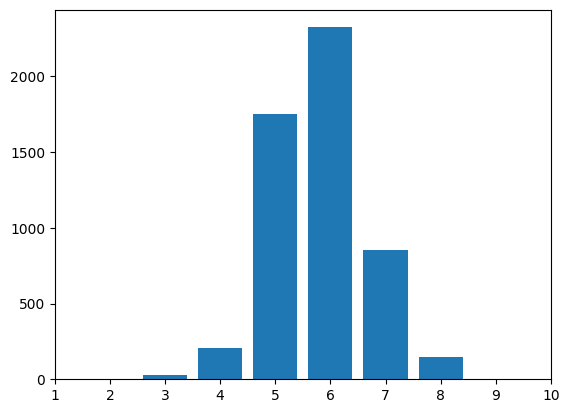

In [28]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([ 1,2,3,4,5,6,7,8,9, 10])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('wine quality')
ax.set_title('wine quality',
              fontsize = 10)
plt.show()

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['fixed_acidity','pH',"density","residual_sugar"]],
                                                df['quality'],
                                                train_size = 0.80,
                                                random_state = 42)